# 클린업 3주차 패키지 과제 - 3팀 선형대수학팀 김지민

## Chapter 1. 모델링을 위한 전처리

### 문제 0 기본 세팅

In [1]:
library(tidyverse)
library(data.table)
library(gridExtra)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

√ ggplot2 3.3.3     √ purrr   0.3.4
√ tibble  3.0.4     √ dplyr   1.0.2
√ tidyr   1.1.2     √ stringr 1.4.0
√ readr   1.4.0     √ forcats 0.5.0

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


The following object is masked from 'package:purrr':

    transpose



Attaching package: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




In [2]:
setwd('C:/Users/fleur/2021 P-SAT/패키지과제/클린업 3주차')

In [3]:
trainset = fread('data.csv', data.table = FALSE)
testset = fread('test.csv', data.table = FALSE)

In [4]:
trainset %>% head

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,N/A,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24,never smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1


In [5]:
testset %>% head

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<int>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<int>
1,56669,Male,81,0,0,Yes,Private,Urban,186.21,29,formerly smoked,1
2,58202,Female,50,1,0,Yes,Self-employed,Rural,167.41,30.9,never smoked,1
3,13861,Female,52,1,0,Yes,Self-employed,Urban,233.29,48.9,never smoked,1
4,38047,Female,65,0,0,Yes,Private,Rural,100.98,28.2,formerly smoked,1
5,69160,Male,59,0,0,Yes,Private,Rural,211.78,N/A,formerly smoked,1
6,47306,Male,58,0,0,No,Private,Rural,92.62,32,Unknown,1


### [ Train data(data.csv) 전처리 및 EDA ]

### 문제 1 'bmi' 변수 numeric 자료형으로 변환 + mean imputation

In [6]:
trainset$bmi = trainset$bmi %>% as.numeric

Warning message in trainset$bmi %>% as.numeric:
"강제형변환에 의해 생성된 NA 입니다"


In [7]:
mean_imp = function(x) replace(x, is.na(x), mean(x, na.rm = TRUE))
trainset = trainset %>% lapply(mean_imp) %>% as.data.frame()

Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"


In [8]:
trainset %>% head

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
1,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
2,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.82782,never smoked,1
3,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
4,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
5,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.40000,never smoked,1


In [9]:
trainset %>% is.na %>% sum

[1] 0

### 문제 2 문자형(character) 변수의 명목형(factor) 변수로의 변환

In [10]:
trainset[sapply(trainset, is.character)] = trainset[sapply(trainset, is.character)] %>% lapply(as.factor) %>% as.data.frame()

In [11]:
trainset %>% str

'data.frame':	4087 obs. of  12 variables:
 $ id               : num  9046 51676 31112 60182 1665 ...
 $ gender           : Factor w/ 3 levels "Female","Male",..: 2 1 2 1 1 2 1 1 1 1 ...
 $ age              : num  67 61 80 49 79 74 69 59 78 81 ...
 $ hypertension     : num  0 0 0 0 1 1 0 0 0 1 ...
 $ heart_disease    : num  1 0 1 0 0 1 0 0 0 0 ...
 $ ever_married     : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 1 2 2 2 ...
 $ work_type        : Factor w/ 5 levels "children","Govt_job",..: 4 5 4 4 5 4 4 4 4 4 ...
 $ Residence_type   : Factor w/ 2 levels "Rural","Urban": 2 1 1 2 1 1 2 1 2 1 ...
 $ avg_glucose_level: num  229 202 106 171 174 ...
 $ bmi              : num  36.6 28.8 32.5 34.4 24 ...
 $ smoking_status   : Factor w/ 4 levels "formerly smoked",..: 1 2 2 3 2 2 2 4 4 2 ...
 $ stroke           : num  1 1 1 1 1 1 1 1 1 1 ...


### 문제 3 'id' 변수 제거

In [13]:
trainset = trainset %>% select(-'id')
trainset %>% head

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
1,Male,67,0,1,Yes,Private,Urban,228.69,36.60000,formerly smoked,1
2,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.82782,never smoked,1
3,Male,80,0,1,Yes,Private,Rural,105.92,32.50000,never smoked,1
4,Female,49,0,0,Yes,Private,Urban,171.23,34.40000,smokes,1
5,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00000,never smoked,1
6,Male,74,1,1,Yes,Private,Rural,70.09,27.40000,never smoked,1


### 문제 4 타겟('stroke')값별 범주형 변수 분포 시각화

In [14]:
# 시각화 위한 데이터셋
plotset_fctr = trainset %>% gather(key = 'key', value = 'value', work_type, smoking_status,
                              Residence_type, hypertension, heart_disease, gender,
                              ever_married)
plotset_fctr %>% head

Warning message:
"attributes are not identical across measure variables;
they will be dropped"


,age,avg_glucose_level,bmi,stroke,key,value
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,67,228.69,36.60000,1,work_type,Private
2,61,202.21,28.82782,1,work_type,Self-employed
3,80,105.92,32.50000,1,work_type,Private
4,49,171.23,34.40000,1,work_type,Private
5,79,174.12,24.00000,1,work_type,Self-employed
6,74,70.09,27.40000,1,work_type,Private


Warning message:
"Duplicated aesthetics after name standardisation: fill"
Warning message:
"Duplicated aesthetics after name standardisation: fill"


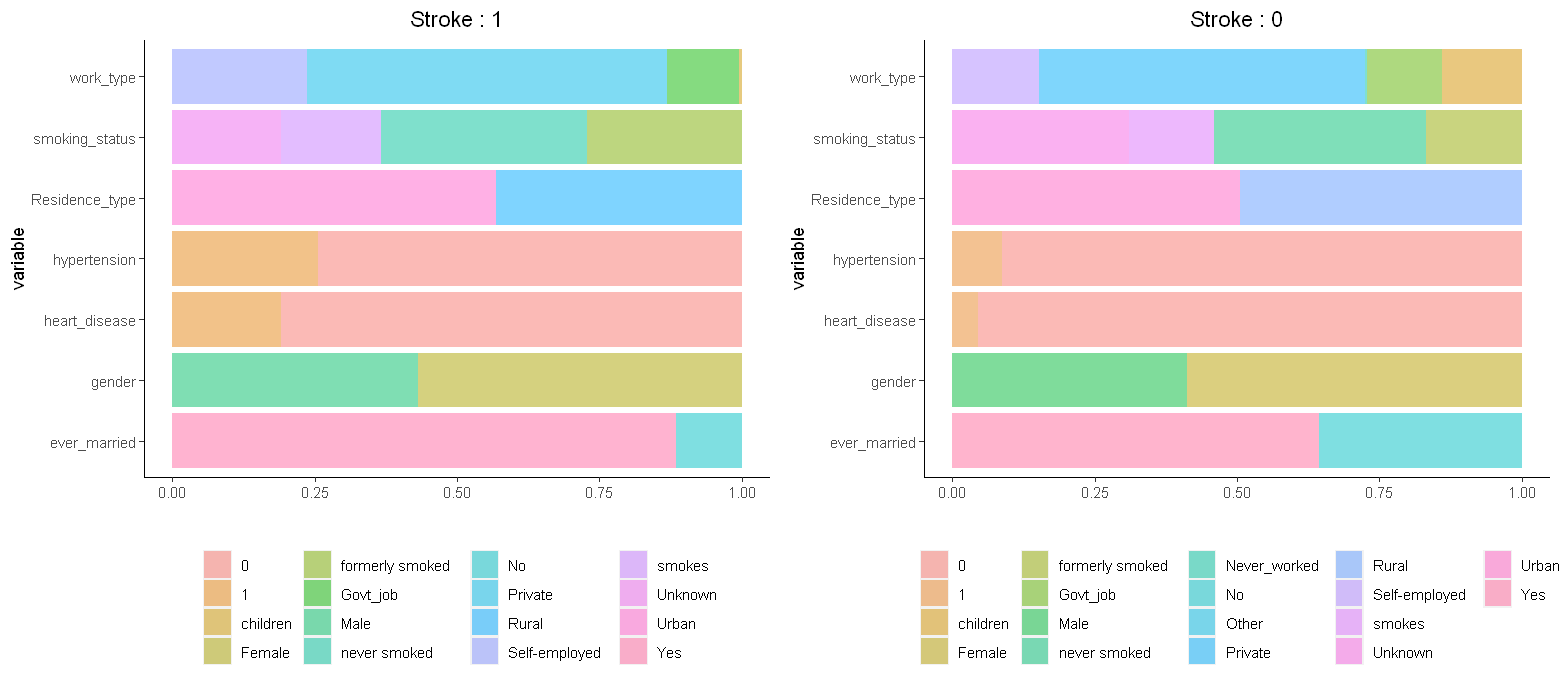

In [15]:
options(repr.plot.width = 13, repr.plot.height = 5.7)

fctr_stroke.1 <- plotset_fctr[plotset_fctr$stroke == 1,] %>% 
  ggplot(aes(y = key, fill = value, fill = value)) +
  geom_bar(position='fill', alpha = 0.5) +
  labs(x = '', y = 'variable', title = 'Stroke : 1') +
  theme(axis.line = element_line(colour = "black"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "bottom", legend.title = element_blank())

fctr_stroke.0 <- plotset_fctr[plotset_fctr$stroke == 0,] %>% 
  ggplot(aes(y = key, fill = value, fill = value)) +
  geom_bar(position='fill', alpha = 0.5) +
  labs(x = '', y = 'variable', title = 'Stroke : 0') +
  theme(axis.line = element_line(colour = "black"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "bottom", legend.title = element_blank())

grid.arrange(fctr_stroke.1, fctr_stroke.0, ncol=2)

뇌졸중을 일으킨(1) 사람들과 일으키지 않은(0) 사람들의 데이터를 비교해보았을 때,  
1) work_type: 양쪽 모두 'Private'의 유형이 가장 많고, 뚜렷한 차이가 있다면 뇌졸중을 일으키지 않은 경우 'children' 유형의 비율이 뇌졸중을 일으킨 쪽보다 눈에 띄게 많다.  
2) smoking_status: 양쪽의 비율이 얼추 비슷한 듯 보이고 양쪽 모두 담배를 한번도 피지 않은 경우가 가장 많으나, 흡연자이거나 흡연자였던 경우가 뇌졸중을 일으킨 쪽에 더 많아 흡연 여부의 영향력을 무시할 수 없을 것으로 보인다. 뇌졸중을 일으키지 않은 쪽의 경우 'unknown' 값이 많다.  
3) Residence_type: 양쪽 모두 비슷하나 뇌졸중을 일으킨 경우에는 'urban'이 조금 더 많고, 일으키지 않은 경우는 거의 1:1의 비율이다.  
4) hypertension & heart_disease: 양쪽 모두 고혈압 또는 심장질환을 가지고 있지 않은 경우가 압도적으로 많지만 뇌졸중을 일으킨 쪽에 병을 가진 사람의 비율이 훨씬 높아 이 두 질병의 여부는 뇌졸중에 상당한 영향을 끼치는 것으로 예상된다.  
5) gender: 양쪽 모두 여성이 조금 더 많다.  
6) ever_married: 양쪽 모두 결혼을 한 사람의 비율이 높으나 뇌졸중을 일으킨 쪽에서 특히 더 높다.

### 문제 5 타겟(stroke)값별 수치형 변수 분포 시각화

In [16]:
# 시각화 위한 데이터셋
plotset_num = trainset %>% gather(key = 'key', value = 'value', age, avg_glucose_level, bmi)
plotset_num %>% head

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,key,value
,<fct>,<dbl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<dbl>,<chr>,<dbl>
1,Male,0,1,Yes,Private,Urban,formerly smoked,1,age,67
2,Female,0,0,Yes,Self-employed,Rural,never smoked,1,age,61
3,Male,0,1,Yes,Private,Rural,never smoked,1,age,80
4,Female,0,0,Yes,Private,Urban,smokes,1,age,49
5,Female,1,0,Yes,Self-employed,Rural,never smoked,1,age,79
6,Male,1,1,Yes,Private,Rural,never smoked,1,age,74


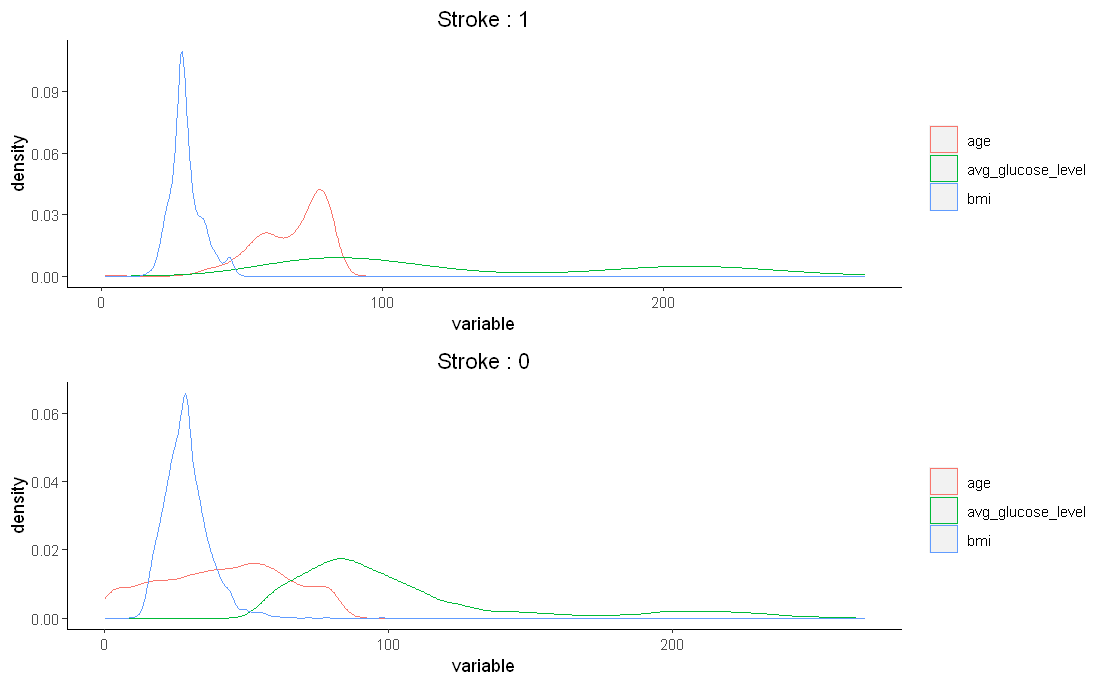

In [17]:
options(repr.plot.width = 9.3, repr.plot.height = 5.7)

num_stroke.1 = plotset_num[plotset_num$stroke == 1,] %>% 
  ggplot(aes(x = value, color = key)) +
  geom_density(aes(value, color = key)) +
  labs(x = 'variable', y = 'density', title = 'Stroke : 1') +
  theme(axis.line = element_line(colour = "black"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "right", legend.title = element_blank())

num_stroke.0 = plotset_num[plotset_num$stroke == 0,] %>% 
  ggplot(aes(x = value, color = key)) +
  geom_density(aes(value, color = key)) +
  labs(x = 'variable', y = 'density', title = 'Stroke : 0') +
  theme(axis.line = element_line(colour = "black"),
        panel.background = element_blank(),
        plot.title = element_text(hjust = 0.5),
        legend.position = "right", legend.title = element_blank())

grid.arrange(num_stroke.1, num_stroke.0, ncol = 1)

뇌졸중을 일으킨(1) 사람들과 일으키지 않은(0) 사람들의 데이터를 비교해보았을 때,  
1) age: 뇌졸중을 일으킨 경우에는 고령의 비율이 높고 일으키지 않은 경우는 연령 간 비율이 흡사하다. 나이가 뇌졸중에 가지는 영향력이 꽤 큰 것으로 보인다.    
2) avg_glucose_level: 뇌졸중을 일으키지 않은 쪽에는 약 90 정도의 평균 혈당 수치에 가장 많은 사람들이 밀집되어 있다는 뚜렷한 추세가 있는데, 뇌졸중을 일으킨 쪽에서는 그 추세가 훨씬 약하다.  
3) bmi: 양쪽 모두 비슷한 지점에서 정점을 가진 bell shape으로 나타나 추세가 비슷하지만, 뇌졸중을 일으킨 쪽에 높은 bmi 지수를 보인 사람들이 조금 더 많이 존재하는 것으로 보인다.

### 문제 6 타겟 변수와 범주형 변수에 대한 카이스퀘어 독립성 검정

In [18]:
chi_df = data.frame('cate_var' = c('gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 
                                   'smoking_status'), 'chi' = NA)

In [19]:
for (i in 1:nrow(chi_df)){
    chi_df[i,2] = ifelse(chisq.test(trainset$stroke, trainset[,chi_df[i,1]])$p.value < 0.05, 'denied', 'accept')
}

Warning message in chisq.test(trainset$stroke, trainset[, chi_df[i, 1]]):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(trainset$stroke, trainset[, chi_df[i, 1]]):
"Chi-squared approximation may be incorrect"


In [20]:
chi_df

cate_var,chi
<chr>,<chr>
gender,accept
hypertension,denied
heart_disease,denied
ever_married,denied
work_type,denied
Residence_type,accept
smoking_status,denied


### 문제 7 카이스퀘어 독립성 검정에서 귀무가설을 accept한 범주형 변수 제거

In [21]:
trainset = trainset %>% select(-'gender', -'Residence_type')
trainset %>% head

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
1,67,0,1,Yes,Private,228.69,36.60000,formerly smoked,1
2,61,0,0,Yes,Self-employed,202.21,28.82782,never smoked,1
3,80,0,1,Yes,Private,105.92,32.50000,never smoked,1
4,49,0,0,Yes,Private,171.23,34.40000,smokes,1
5,79,1,0,Yes,Self-employed,174.12,24.00000,never smoked,1
6,74,1,1,Yes,Private,70.09,27.40000,never smoked,1


### [Test data(test.csv) 전처리]

### 문제 8 test data에도 동일한 전처리

In [22]:
# 'bmi' 변수 자료형 변환 + mean imputation
testset$bmi = testset$bmi %>% as.numeric
testset = testset %>% lapply(mean_imp) %>% as.data.frame()

# 문자형 변수 자료형 바꾸기
testset[sapply(testset, is.character)] = testset[sapply(testset, is.character)] %>% lapply(as.factor) %>% as.data.frame()

# 변수 추가적 제거
testset = testset %>% select(-'id', -'gender', -'Residence_type')

Warning message in testset$bmi %>% as.numeric:
"강제형변환에 의해 생성된 NA 입니다"
Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"
Warning message in mean.default(x, na.rm = TRUE):
"argument is not numeric or logical: returning NA"


In [23]:
testset %>% head

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>
1,81,0,0,Yes,Private,186.21,29.00000,formerly smoked,1
2,50,1,0,Yes,Self-employed,167.41,30.90000,never smoked,1
3,52,1,0,Yes,Self-employed,233.29,48.90000,never smoked,1
4,65,0,0,Yes,Private,100.98,28.20000,formerly smoked,1
5,59,0,0,Yes,Private,211.78,29.15319,formerly smoked,1
6,58,0,0,No,Private,92.62,32.00000,Unknown,1


In [24]:
testset %>% is.na %>% sum

[1] 0

## Chapter 2. Catboost

In [26]:
library(catboost)
library(caret)
library(MLmetrics)

Warning message:
"package 'caret' was built under R version 4.0.4"
Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Warning message:
"package 'MLmetrics' was built under R version 4.0.4"

Attaching package: 'MLmetrics'


The following objects are masked from 'package:caret':

    MAE, RMSE


The following object is masked from 'package:base':

    Recall




### 문제 0 Catboost 모델의 특성 및 대표적 파라미터

**CatBoost**란 *'Categorical Boost'*의 약자로, **범주형 변수가 많은 경우에** 유용하게 쓰이는 부스팅 기법이며 **level-wise**로 트리를 만들어나간다. 또한 모델의 알고리즘이 잔차를 일괄적으로 계산하는 것이 아닌, **데이터의 일부**만 가지고 잔차를 계산한 뒤 이를 기반으로 모델을 만들고 남은 또다른 데이터의 잔차는 이 모델을 통해 예측하는 방식을 가진다는 것이 특징적이다. 파라미터 튜닝에 크게 민감한 모델은 아니며, 코드로 구현 시 학습에 사용될 데이터프레임을 **Pool 형태로 변환**해야 한다.  
  
  
### parameter  
* loss_function: loss function(분류 모형: Logloss)  
* random_seed: 시드값 
* depth: 트리의 depth
* iterations: 생성할 트리 개수의 최대값  
* train_dir: 모델링 결과를 저장할 directory
* logging_level: 매 iteration마다 결과 출력 여부 (silent: 출력하지 않음, verbose: 출력)  
* custom_loss: 모델링 시 추가적으로 추출할 값들(결과 파일에 담김)  



### 문제 1 그리드서치 결과 담을 데이터프레임 생성

In [27]:
logloss_cb = expand.grid(depth = c(4,6,8), iterations = c(100, 200), logloss = NA)
logloss_cb

depth,iterations,logloss
<dbl>,<dbl>,<lgl>
4,100,NA
6,100,NA
8,100,NA
4,200,NA
6,200,NA
8,200,NA


### 문제 2 depth & iterations 튜닝 위한 그리드서치 5-fold CV

In [33]:
set.seed(1234)
catb.cv <- createFolds(trainset$stroke, k = 5, list = TRUE)

start = Sys.time()
for (i in 1:nrow(logloss_cb)){
  print(paste0("depth : ", logloss_cb$depth[i], ", iterations : ", logloss_cb$iterations[i]))
  catb.logloss_temp <- c()
  
  for (j in 1:5){
    print(paste0("FOLD : ", j))
    
    catb.vali_inx <- catb.cv[[j]] 
    catb.train <- trainset[-catb.vali_inx,]
    catb.val <- trainset[catb.vali_inx,]
    
    # 데이터프레임 pool 형식으로 변환 
    train_pool <- catboost.load_pool(
        data = select(catb.train, -'stroke'), label = catb.train[,'stroke'],
        cat_features = which(sapply(select(catb.train, -'stroke'), is.factor)))
      
    val_pool <- catboost.load_pool(
        data = select(catb.val, -'stroke'), label = catb.val[,'stroke'],
        cat_features = which(sapply(select(catb.val, -'stroke'), is.factor)))
      
    # 학습
    params <- list(loss_function = 'Logloss', random_seed = 1234, depth = logloss_cb$depth[i], iterations = logloss_cb$iterations[i],
                   train_dir = 'catboost', logging_level = 'Silent')
    catb.fit <- catboost.train(learn_pool = train_pool, test_pool = val_pool, params = params)
    
    # evaluation
    catb.testerr <- read.table('catboost/test_error.tsv', sep = "\t", header = TRUE)
    catb.logloss <- catb.testerr[which.max(catb.testerr$Logloss), c("Logloss")]
      
    catb.logloss_temp[j] = catb.logloss
  }
  logloss_cb[i,"logloss"] = mean(catb.logloss_temp)
}

catb_runtime = Sys.time() - start

[1] "depth : 4, iterations : 100"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "depth : 6, iterations : 100"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "depth : 8, iterations : 100"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "depth : 4, iterations : 200"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "depth : 6, iterations : 200"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"
[1] "depth : 8, iterations : 200"
[1] "FOLD : 1"
[1] "FOLD : 2"
[1] "FOLD : 3"
[1] "FOLD : 4"
[1] "FOLD : 5"


In [35]:
# 소요된 시간
catb_runtime

Time difference of 57.92137 secs

In [36]:
logloss_cb

depth,iterations,logloss
<dbl>,<dbl>,<dbl>
4,100,0.6052186
6,100,0.6071820
8,100,0.6101628
4,200,0.5813138
6,200,0.5793058
8,200,0.5650448


### 문제 3 그리드서치 결과 logloss값이 가장 낮게 도출된 파라미터 조합

In [37]:
logloss_cb %>% subset(logloss_cb$logloss == min(logloss_cb$logloss))

,depth,iterations,logloss
,<dbl>,<dbl>,<dbl>
6,8,200,0.5650448


### 문제 4 최적 파라미터로 모델 적합 및 평가

In [38]:
train_poool <- catboost.load_pool(
        data = select(trainset, -'stroke'), label = trainset[,'stroke'],
        cat_features = which(sapply(select(trainset, -'stroke'), is.factor)))
      
test_poool <- catboost.load_pool(
        data = select(testset, -'stroke'), label = testset[,'stroke'],
        cat_features = which(sapply(select(testset, -'stroke'), is.factor)))
      
# 학습
params <- list(loss_function = 'Logloss', random_seed = 1234, depth = 8, iterations = 200, train_dir = 'RESULT', logging_level = 'Silent')
catb.fit <- catboost.train(learn_pool = train_poool, test_pool = test_poool, params = params)
    
# evaluation
catb.testerr <- read.table('RESULT/test_error.tsv', sep = "\t", header = TRUE)
catb.logloss <- catb.testerr[which.max(catb.testerr$Logloss), c("Logloss")]

In [39]:
catb.logloss

[1] 0.5576122

## Chapter 3. K-means Clustering

In [40]:
library(factoextra)
library(cluster)

Warning message:
"package 'factoextra' was built under R version 4.0.4"
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [41]:
clust_data = trainset[,c('age','avg_glucose_level','bmi')]

### 문제 1 수치형 변수의 정규화 스케일링(scale)

In [42]:
clust_scaled = clust_data %>% scale(center = TRUE, scale = TRUE)

In [43]:
clust_scaled %>% head

age,avg_glucose_level,bmi
1.0512426,2.713407641,1.0068030
0.7863068,2.126676777,0.0000000
1.6252702,-0.006869858,0.4756919
0.2564352,1.440237118,0.7218166
1.5811142,1.504272322,-0.6253920
1.3603344,-0.800773440,-0.1849585


### 문제 2 적절한 k값 선정 위한 시각화

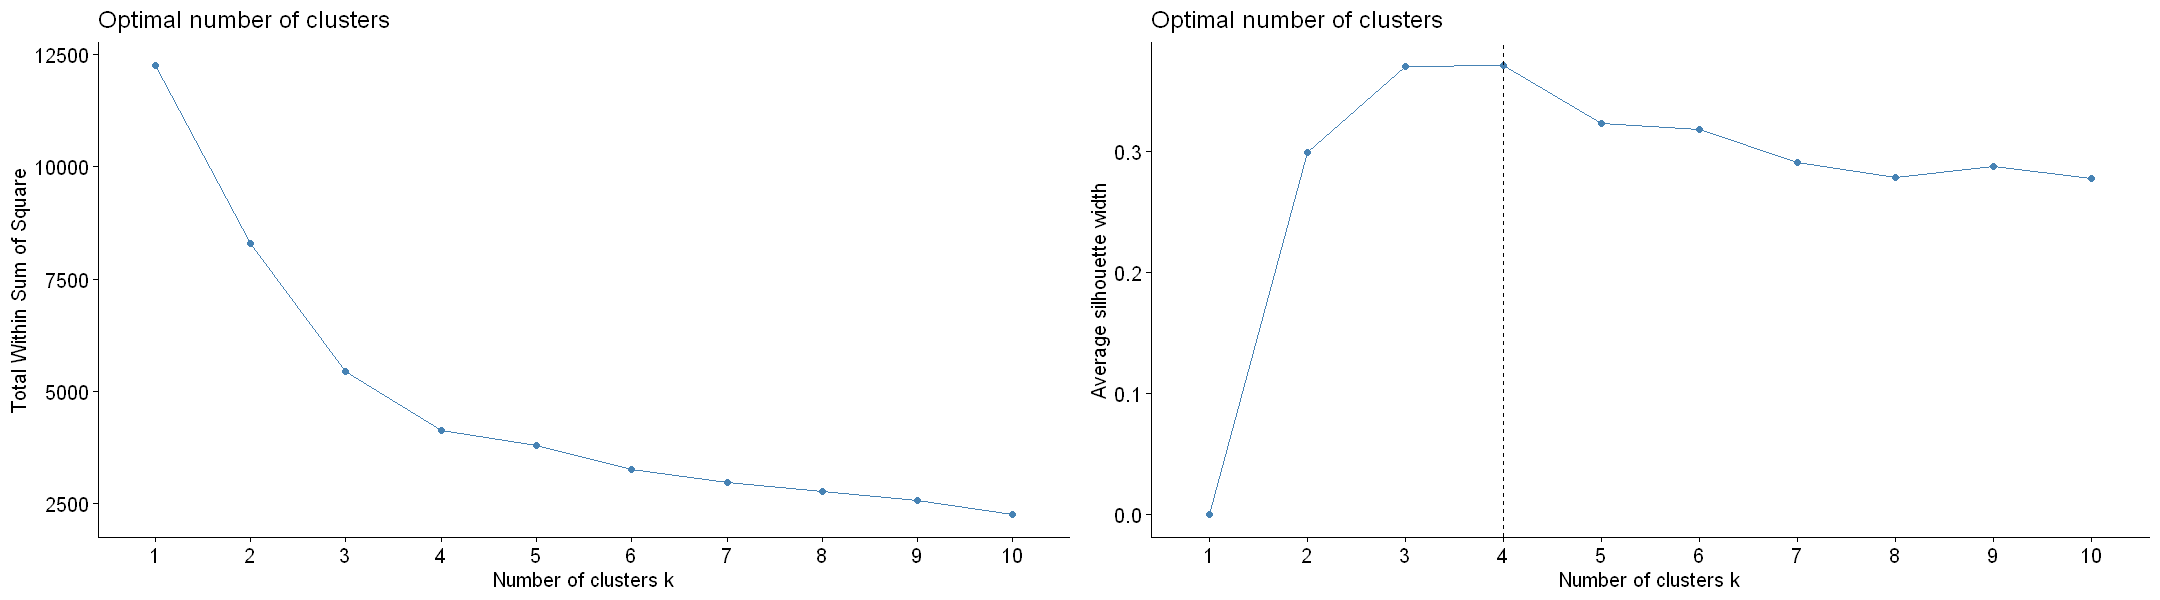

In [45]:
options(repr.plot.width = 18, repr.plot.height = 5)

wss = fviz_nbclust(x = clust_scaled, FUNcluster = kmeans, method='wss')
sil = fviz_nbclust(x = clust_scaled, FUNcluster = kmeans, method = "silhouette") + geom_vline(xintercept = 4, linetype = 2)

grid.arrange(wss, sil, ncol = 2)

왼쪽의 WSS 플랏에서는 분산의 총합(y)이 급격하게 감소하는 지점인 k = 3 또는 4 정도가 적절한 듯 보이고, 오른쪽의 실루엣 계수 플랏에서도 k = 3 또는 4일 때 가장 높은 실루엣 계수를 가져 최적의 k값이 될 것으로 보인다. 따라서 적절한 k값은 k = 3 또는 4가 되겠다.

### 문제 3 K-means 클러스터링

In [46]:
set.seed(1234)
kmeans_res = kmeans(clust_scaled, nstart = 1, iter.max = 30, centers = 3)

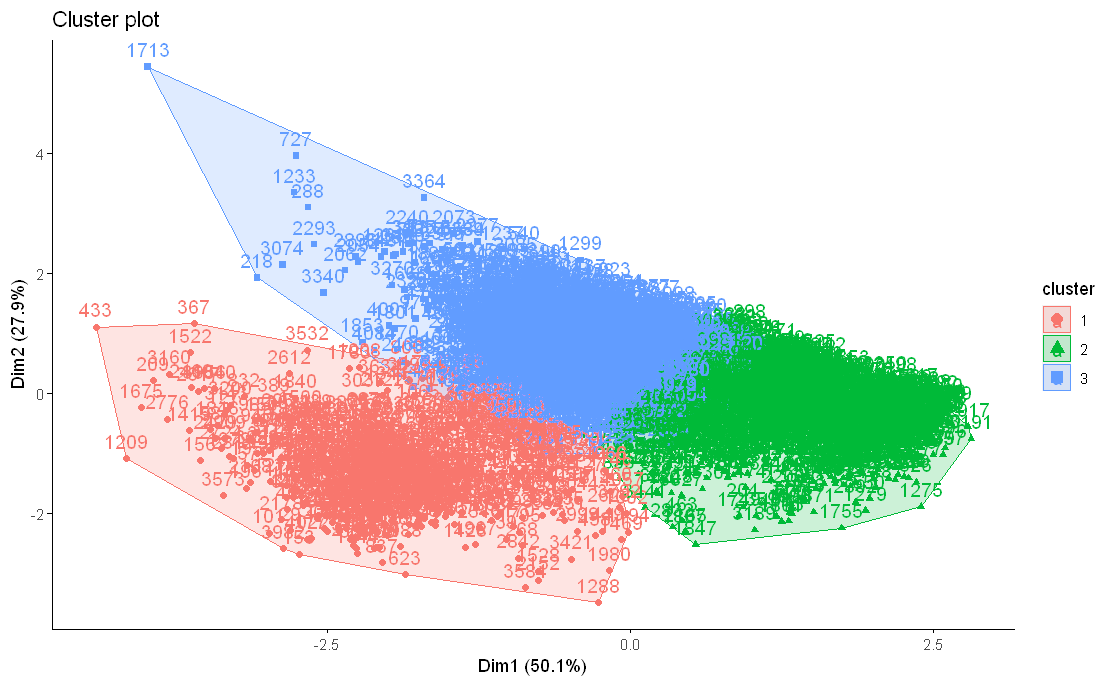

In [49]:
options(repr.plot.width = 9.3, repr.plot.height = 5.7)
fviz_cluster(kmeans_res, clust_scaled)+ theme(axis.line = element_line(colour = "black"),
                                              panel.background = element_blank())

### 문제 4 클러스터링 결과 box plot 시각화

Warning message in clust_scaled$cluster = kmeans_res$cluster:
"좌변을 리스트로 강제형변환합니다"


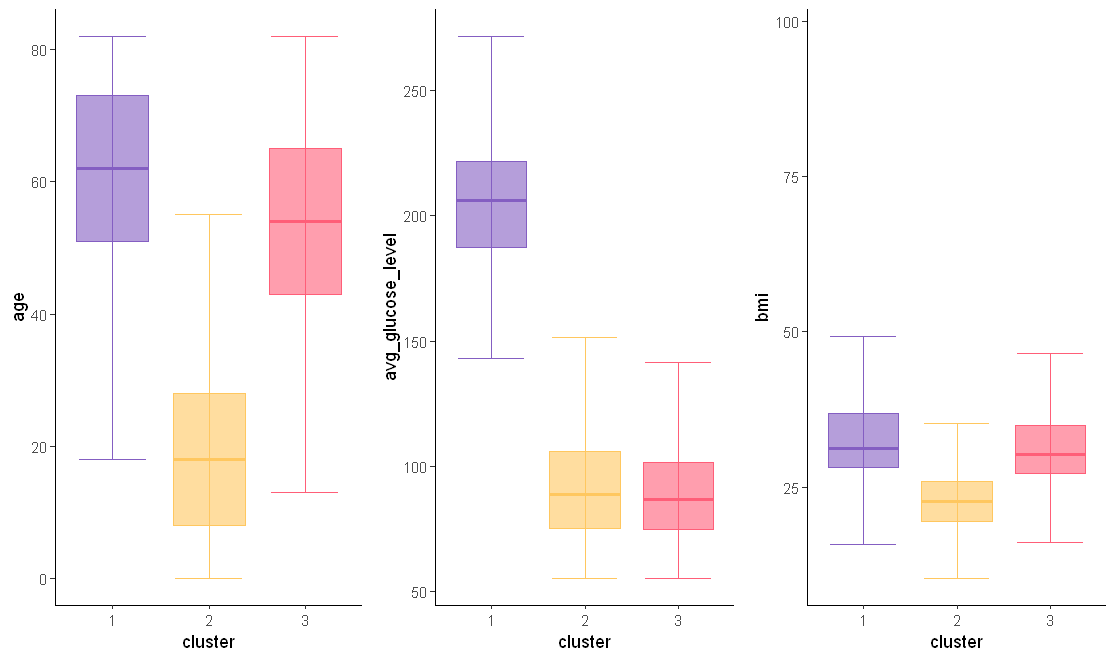

In [50]:
clust_scaled$cluster = kmeans_res$cluster
clust_data$cluster = kmeans_res$cluster

# 시각화
options(repr.plot.width = 9.3, repr.plot.height = 5.5)

clust_age = clust_data %>%
  ggplot(aes(x = as.factor(cluster),
             y = age,
             fill = as.factor(cluster),
             color = as.factor(cluster))) +
  stat_boxplot(geom = "errorbar",width=0.7) +
  geom_boxplot(alpha=0.6,
               outlier.shape = NA) +
  theme_classic() +
  theme(legend.position = "none") +
  scale_fill_manual(values = c('#845ec2', '#ffc75f', '#ff5e78')) +
  scale_color_manual(values = c('#845ec2', '#ffc75f', '#ff5e78')) +
  labs(x = 'cluster')

clust_glu = clust_data %>%
  ggplot(aes(x = as.factor(cluster),
             y = avg_glucose_level,
             fill = as.factor(cluster),
             color = as.factor(cluster))) +
  stat_boxplot(geom = "errorbar",width=0.7) +
  geom_boxplot(alpha=0.6,
               outlier.shape = NA) +
  theme_classic() +
  theme(legend.position = "none") +
  scale_fill_manual(values = c('#845ec2', '#ffc75f', '#ff5e78')) +
  scale_color_manual(values = c('#845ec2', '#ffc75f', '#ff5e78')) +
  labs(x = 'cluster')

clust_bmi = clust_data %>%
  ggplot(aes(x = as.factor(cluster),
             y = bmi,
             fill = as.factor(cluster),
             color = as.factor(cluster))) +
  stat_boxplot(geom = "errorbar",width=0.7) +
  geom_boxplot(alpha=0.6,
               outlier.shape = NA) +
  theme_classic() +
  theme(legend.position = "none") +
  scale_fill_manual(values = c('#845ec2', '#ffc75f', '#ff5e78')) +
  scale_color_manual(values = c('#845ec2', '#ffc75f', '#ff5e78')) +
  labs(x = 'cluster')

grid.arrange(clust_age, clust_glu, clust_bmi, ncol = 3)

* **cluster 1:** 나이의 중간값이 60세 이상으로 고령이고, 혈당 수치가 눈에 띄게 높으며, bmi 지수도 높은 축에 속함  
* **cluster 2:** 나이의 중간값이 20세가 채 안 되고 60세가 넘는 사람이 없어 상대적으로 매우 어린 편이며 혈당 수치가 낮고, bmi 지수도 가장 낮음  
* **cluster 3:** 나이는 cluster 1의 경우보다는 조금 어리지만 중간값이 50세 이상이고 나이대의 범위가 넓으며, 혈당 수치는 가장 낮고 bmi 지수는 cluster 1의 것보다는 조금 낮지만 마냥 낮다고는 볼 수 없음  
  
cluster 1의 경우가 뇌졸중의 위험이 가장 높아 예의 주시해야 하는 그룹, 혹은 뇌졸중을 일으킨 사람이 대거 포진된 그룹인 것으로 보이고, cluster 2가 가장 뇌졸중의 위험으로부터 먼 그룹, cluster 3은 보통의 경우로 약간의 경계가 필요한 그룹인 것으로 보인다.